## Feature Engineering and EDA for CUSTOMERS

In [188]:
#from source.dataspark_constants import ROW_DATA_PATH , PROCESSED_DATA_PATH
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.impute import SimpleImputer
import os

In [122]:
file_path = os.path.join('source', 'repository', 'row_data')
os.chdir(r'C:\DataSpark\source\repository\row_data')
df = pd.read_csv(r".\Customers.csv" ,  encoding='ISO-8859-1')
df

,CustomerKey,Gender,Name,City,State Code,State,Zip Code,Country,Continent,Birthday
0,301,Female,Lilly Harding,WANDEARAH EAST,SA,South Australia,5523,Australia,Australia,7/3/1939
1,325,Female,Madison Hull,MOUNT BUDD,WA,Western Australia,6522,Australia,Australia,9/27/1979
2,554,Female,Claire Ferres,WINJALLOK,VIC,Victoria,3380,Australia,Australia,5/26/1947
3,786,Male,Jai Poltpalingada,MIDDLE RIVER,SA,South Australia,5223,Australia,Australia,9/17/1957
4,1042,Male,Aidan Pankhurst,TAWONGA SOUTH,VIC,Victoria,3698,Australia,Australia,11/19/1965
...,...,...,...,...,...,...,...,...,...,...
15261,2099600,Female,Denisa Duï¿½kovï¿½,Houston,TX,Texas,77017,United States,North America,3/25/1936
15262,2099618,Male,Justin Solï¿½rzano,Mclean,VA,Virginia,22101,United States,North America,2/16/1992
15263,2099758,Male,Svend Petrussen,Wilmington,NC,North Carolina,28405,United States,North America,11/9/1937
15264,2099862,Female,Lorenza Rush,Riverside,CA,California,92501,United States,North America,10/12/1937


In [123]:
df.shape

(15266, 10)

In [124]:
df.dtypes

CustomerKey     int64
Gender         object
Name           object
City           object
State Code     object
State          object
Zip Code       object
Country        object
Continent      object
Birthday       object
dtype: object

In [125]:
df['Zip Code'].value_counts().index

Index(['90017', 'S4P 3Y2', 'H3C 5K4', '48075', '10016', 'V6B 3K9', '60606',
       '94612', '10011', '30303',
       ...
       '23455', '27855', '1776', '84627', '65674', '96749', '63132', '60453',
       '79370', '68710'],
      dtype='object', name='Zip Code', length=9505)

In [126]:
#Numerical Columns
numerical_columns =[item for item in df.columns if df[item].dtype != 'O']
print(numerical_columns)

['CustomerKey']


In [127]:
#categorical columns
categorical_columns =[item for item in df.columns if df[item].dtype == 'O']
print(categorical_columns)

['Gender', 'Name', 'City', 'State Code', 'State', 'Zip Code', 'Country', 'Continent', 'Birthday']


In [128]:
#check for null values
df.isnull().sum()

CustomerKey     0
Gender          0
Name            0
City            0
State Code     10
State           0
Zip Code        0
Country         0
Continent       0
Birthday        0
dtype: int64

In [129]:
#df['State Code'].unique
df['State Code'].mode()

0    CA
Name: State Code, dtype: object

In [130]:
#filling null values
imputer =SimpleImputer(strategy='most_frequent')
df['State Code'] = imputer.fit_transform(df[['State Code']]).ravel()
df.isnull().sum()

CustomerKey    0
Gender         0
Name           0
City           0
State Code     0
State          0
Zip Code       0
Country        0
Continent      0
Birthday       0
dtype: int64

In [131]:
#check for duplications
df.duplicated().sum()

np.int64(0)

In [132]:
#Deriving new features
df['Age'] = datetime.now().year - df['Birthday'].str.split('/').str[2].astype(int)
df['Age']


0        85
1        45
2        77
3        67
4        59
         ..
15261    88
15262    32
15263    87
15264    87
15265    59
Name: Age, Length: 15266, dtype: int64

## EDA

In [147]:
#Detecting outliers
def detect_remove_outliers(df,column):
        plt.boxplot(df[column])
        plt.title("Before outlier for " + column)
        plt.show()
       
        q1=df[column].quantile(0.25)
        print("Q1",q1)
        q3 = df[column].quantile(0.75)
        iqr = q3-q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q1 + 1.5 * iqr
        df.query(f'@lower_bound < {column} <= @upper_bound', inplace=True)

        plt.boxplot(df[column])
        plt.title("AFter outlier")
        plt.show()
        return df

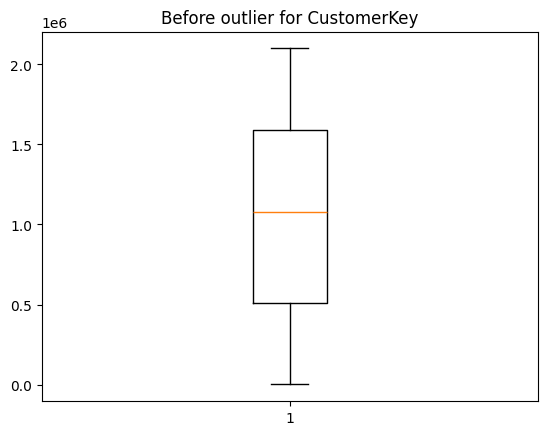

Q1 512389.25


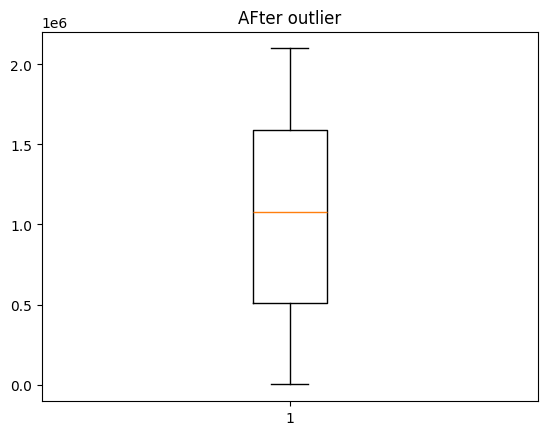

In [148]:
#no outliers in the dataset
for x in numerical_columns:
    detect_remove_outliers(df , x)

In [150]:
#sumary statistics
df.describe()

,CustomerKey,Age
count,1.508400e+04,15084.000000
mean,1.059288e+06,55.373840
std,6.131260e+05,19.086401
min,3.010000e+02,22.000000
25%,5.123892e+05,39.000000
50%,1.078544e+06,56.000000
75%,1.592975e+06,72.000000
max,2.099937e+06,88.000000


In [168]:
male_count=df[df['Gender'] == 'Male']['CustomerKey'].count()
female_count = df[df['Gender'] == 'Female']['CustomerKey'].count()
int(male_count) , int(female_count)
f"Male customers {int(male_count)} is more than female customers {int(female_count)} "

'Male customers 7667 is more than female customers 7417 '

In [172]:

bins = [0,13,21,35,55,float('inf')]
labels = ['Child','Teenager','Youngster','Middle-aged','Senior citizens']
df['Age Group']=pd.cut(df['Age'],bins=bins,labels=labels,right=False)
df

,CustomerKey,Gender,Name,City,State Code,State,Zip Code,Country,Continent,Birthday,Age,Age Group
0,301,Female,Lilly Harding,WANDEARAH EAST,SA,South Australia,5523,Australia,Australia,7/3/1939,85,Senior citizens
1,325,Female,Madison Hull,MOUNT BUDD,WA,Western Australia,6522,Australia,Australia,9/27/1979,45,Middle-aged
2,554,Female,Claire Ferres,WINJALLOK,VIC,Victoria,3380,Australia,Australia,5/26/1947,77,Senior citizens
3,786,Male,Jai Poltpalingada,MIDDLE RIVER,SA,South Australia,5223,Australia,Australia,9/17/1957,67,Senior citizens
4,1042,Male,Aidan Pankhurst,TAWONGA SOUTH,VIC,Victoria,3698,Australia,Australia,11/19/1965,59,Senior citizens
...,...,...,...,...,...,...,...,...,...,...,...,...
15261,2099600,Female,Denisa Duï¿½kovï¿½,Houston,TX,Texas,77017,United States,North America,3/25/1936,88,Senior citizens
15262,2099618,Male,Justin Solï¿½rzano,Mclean,VA,Virginia,22101,United States,North America,2/16/1992,32,Youngster
15263,2099758,Male,Svend Petrussen,Wilmington,NC,North Carolina,28405,United States,North America,11/9/1937,87,Senior citizens
15264,2099862,Female,Lorenza Rush,Riverside,CA,California,92501,United States,North America,10/12/1937,87,Senior citizens


In [179]:
#Catrgory of customers based on age group
for item in labels:
    number=df[df['Age Group'] == item]['Name'].count()
    print(f"{item} : {number}")


Child : 0
Teenager : 0
Youngster : 2798
Middle-aged : 4495
Senior citizens : 7791


<Axes: xlabel='Age Group', ylabel='Count'>

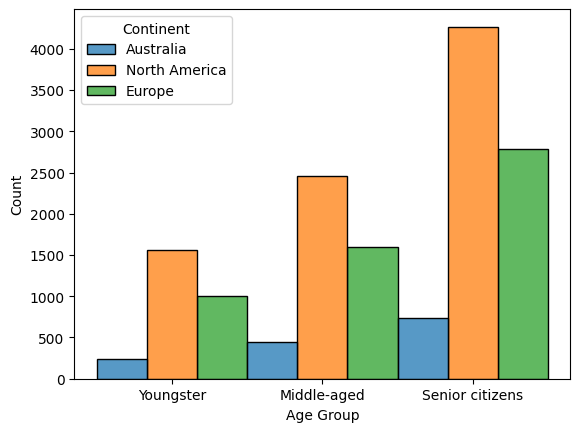

In [191]:
sns.histplot(data=df,x="Age Group",hue = 'Continent' , multiple="dodge")


<module 'seaborn' from 'c:\\DataSpark\\env\\Lib\\site-packages\\seaborn\\__init__.py'>

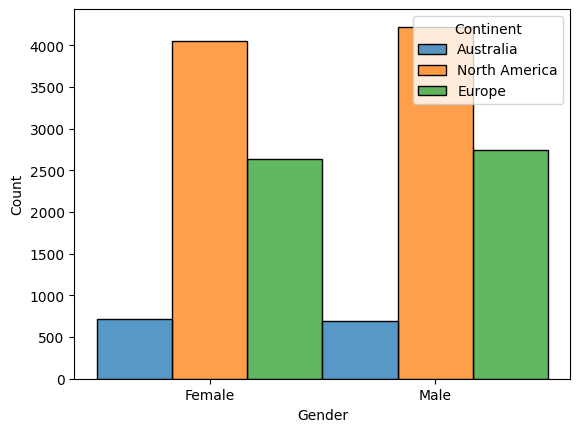

In [193]:
sns.histplot(data=df,x="Gender",hue = 'Continent' , multiple="dodge")
sns

In [204]:
os.chdir(r'C:\DataSpark\source\repository\processed_data')
df.to_csv(r".\Customers.csv")